In [2]:
import pandas as pd
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tqdm import tqdm
import pickle
from sklearn.neighbors import NearestNeighbors

In [3]:
model_resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [4]:
model_resnet50.trainable = False

In [5]:
model = Sequential([
    model_resnet50,
    GlobalMaxPooling2D(),
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_max_pooling2d (Globa  (None, 2048)             0         
 lMaxPooling2D)                                                  
                                                                 
Total params: 23,587,712
Trainable params: 0
Non-trainable params: 23,587,712
_________________________________________________________________


In [6]:
def extract_features(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    expended_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expended_img_array)
    result = model.predict(preprocessed_img, verbose=False).flatten()
    normalized_result = result / np.linalg.norm(result)

    return normalized_result

In [15]:
path = 'dataset/images/'
filesname = [os.path.join(path, name) for name in os.listdir(path) if name.endswith('.jpg')]

In [28]:
features_list = [extract_features(file, model) for file in tqdm(filesname[:500])]

100%|██████████| 500/500 [03:07<00:00,  2.67it/s]


In [61]:
features_list.shape

(500, 2048)

In [52]:
features_list_2 = [extract_features(file, model) for file in tqdm(filesname[500:1000])]

100%|██████████| 500/500 [02:09<00:00,  3.85it/s]


In [64]:
features_list_2 = np.array(features_list_2)

In [65]:
features_list_joind = np.append(features_list, features_list_2,0)

In [66]:
features_list_joind.shape

(1000, 2048)

In [67]:
pickle.dump(features_list_joind, open('features_list_embeddings_joined_1000.pkl', 'wb'))
pickle.dump(filesname, open('filenames.pkl', 'wb'))

## Testing / Load Saved Embeddings

In [8]:
# Testing

features_list = np.array(pickle.load(open('static/model/features_list_embeddings.pkl', 'rb')))
filenames = pickle.load(open('static/model/filenames.pkl', 'rb'))

model_resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model_resnet50.trainable = False

model = Sequential([
    model_resnet50,
    GlobalMaxPooling2D(),
])




In [ ]:
# Using Annoy
from annoy import AnnoyIndex


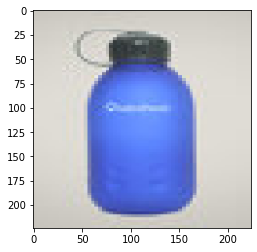

In [106]:
sample_img_path = 'dataset/images/1554.jpg'
plt.imshow(image.load_img(sample_img_path, target_size=(224, 224)))
sample = extract_features(sample_img_path, model)

In [1]:
neighbors = NearestNeighbors(n_neighbors=6,algorithm='brute', radius=0.5, metric='euclidean')
neighbors.fit(features_list)

distances, indices = neighbors.kneighbors([sample])


fig, ax = plt.subplots(2, 3)
for i in range(6):
    name = filenames[indices[0][i]].replace('/kaggle/input/fashion-product-images-small/images/','dataset/images/')
    ax[i//3, i%3].imshow(image.load_img(name, target_size=(224, 224)))
    ax[i//3, i%3].set_title(name)
    ax[i//3, i%3].axis('off')

NameError: name 'NearestNeighbors' is not defined

In [81]:

#plt show 6 images in a single pageplot



# plt.figure(figsize=(20, 20))
# for i in indices[0]:
#     plt.imshow(image.load_img(filenames[i], target_size=(224, 224)))
#
# plt.subplots(2, 3, figsize=(5, 5))
# plt.show()



In [102]:
# write a Machine Learning code to predict the "variety" listed in Column M, based on the "description" in Column in "Assignment Data.csv"

df = pd.read_csv('dataset/Assignment Data.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
 14  Unnamed: 14            0 non-null   

In [101]:
df['description'].apply(lambda x: x.split(' ')[0])


0               Aromas
1                 This
2                 Tart
3            Pineapple
4                 Much
              ...     
129966           Notes
129967        Citation
129968    Well-drained
129969               A
129970            Big,
Name: description, Length: 129971, dtype: object

In [103]:

df['variety'].value_counts()


Pinot Noir                    13272
Chardonnay                    11753
Cabernet Sauvignon             9472
Red Blend                      8946
Bordeaux-style Red Blend       6915
                              ...  
Cabernet Sauvignon-Barbera        1
Sauvignonasse                     1
Forcallà                          1
Meseguera                         1
Bobal-Cabernet Sauvignon          1
Name: variety, Length: 707, dtype: int64